In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12, 8]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_csv('input/analysis_features_dataset.csv')
dffeatured = pd.read_csv('input/final_featured_dataset.csv')

In [3]:
df[:5]

,dealstatus,same_sector,same_country,target_sector,acquiror_sector,deal_type,roa_target,initial_stake
0,0,False,False,Chemicals,Other,acquisition_100%,0.000000,0.0
1,0,True,False,Chemicals,Chemicals,acquisition_100%,-0.000111,0.0
2,0,True,True,Machinery,Machinery,acquisition_100%,0.027818,0.0
3,0,True,True,Machinery,Machinery,acquisition_100%,0.027818,0.0
4,0,False,True,Transport,Other,acquisition_100%,-0.023113,0.0


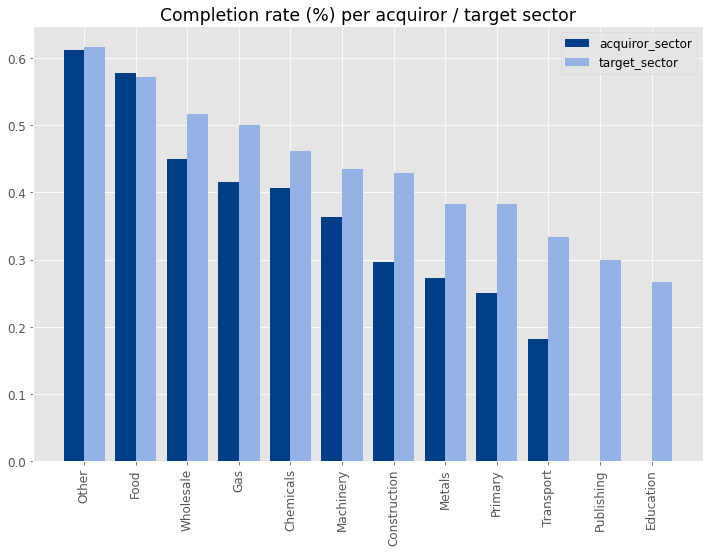

In [4]:
to_check = 'acquiror_sector'
dfgrouped = df.groupby([to_check]).agg({'same_sector': 'count', 'dealstatus': 'sum'})
dfgrouped.columns = ['n_rows', 'completion']
dfgrouped['completion_percent'] = round(dfgrouped['completion'] / dfgrouped['n_rows'], 3)
dfgrouped = dfgrouped[['n_rows', 'completion_percent']].sort_values('completion_percent', ascending=False)
y_pos = range(len(dfgrouped['completion_percent']))
plt.bar([y-0.2 for y in y_pos], dfgrouped['completion_percent'], width=0.4, color='#003F87', label='acquiror_sector')

to_check = 'target_sector'
dfgrouped = df.groupby([to_check]).agg({'same_sector': 'count', 'dealstatus': 'sum'})
dfgrouped.columns = ['n_rows', 'completion']
dfgrouped['completion_percent'] = round(dfgrouped['completion'] / dfgrouped['n_rows'], 3)
dfgrouped = dfgrouped[['n_rows', 'completion_percent']].sort_values('completion_percent', ascending=False)
y_pos = range(len(dfgrouped['completion_percent']))
plt.bar([y+0.2 for y in y_pos], dfgrouped['completion_percent'], width=0.4, color='#93B3E6', label='target_sector')
plt.xticks(y_pos, dfgrouped.index, rotation='vertical')

plt.legend()
plt.title('Completion rate (%) per acquiror / target sector')
plt.show()

In [5]:
dfsectorcross = df.loc[lambda x: (x['target_sector']!='Other') & (x['acquiror_sector']!='Other')]

In [6]:
dfsectorcross_succes = dfsectorcross.loc[lambda x: x['dealstatus']==1]

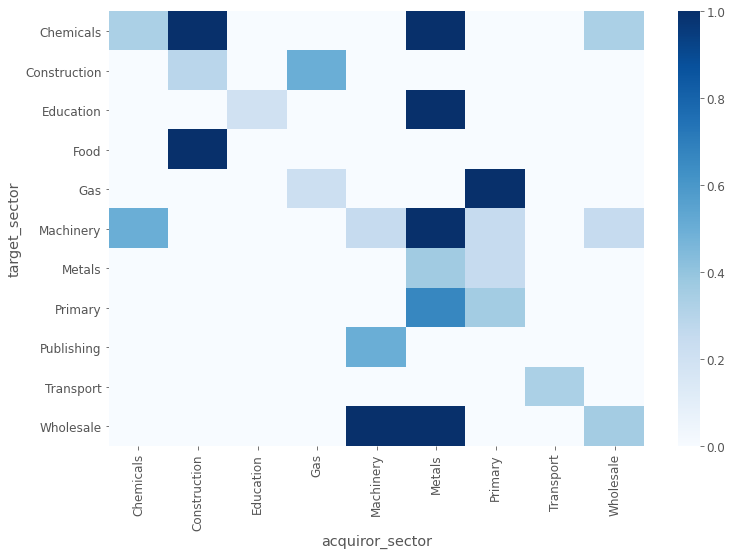

In [7]:
dfcross_sector = pd.crosstab(dfsectorcross['target_sector'], dfsectorcross['acquiror_sector'])
dfcross_sector_succes = pd.crosstab(dfsectorcross_succes['target_sector'], dfsectorcross_succes['acquiror_sector'])
dfcross_sector_succes_percent = (dfcross_sector_succes / dfcross_sector).fillna(0)
ax = sns.heatmap(dfcross_sector_succes_percent, vmin=0, vmax=1, cmap="Blues")

In [8]:
with open('output/model_outputs_20210218144658.json', 'r') as stream:
    model_comparisons = json.load(stream)

In [9]:
model_comparisons['tree']['features']

['deal_type_acquisition_100%',
 'target_sector_other',
 'same_country',
 'target_sector_machinery',
 'target_sector_transport',
 'target_sector_food',
 'target_sector_wholesale',
 'target_sector_gas',
 'acquiror_sector_gas',
 'target_sector_metals',
 'acquiror_sector_metals']

In [13]:
crosstab

dealstatus,0,1
acquiror_sector_metals,,
False,255,260
True,27,22


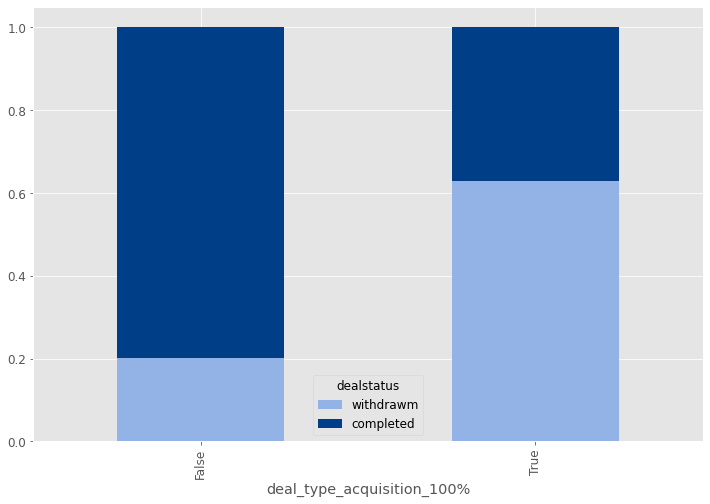

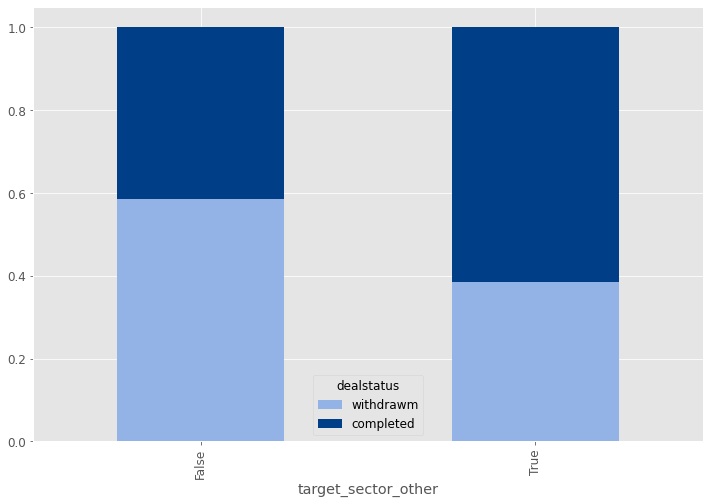

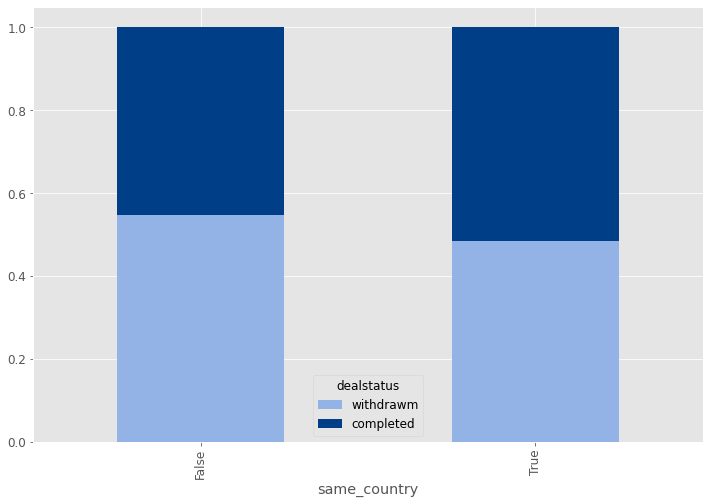

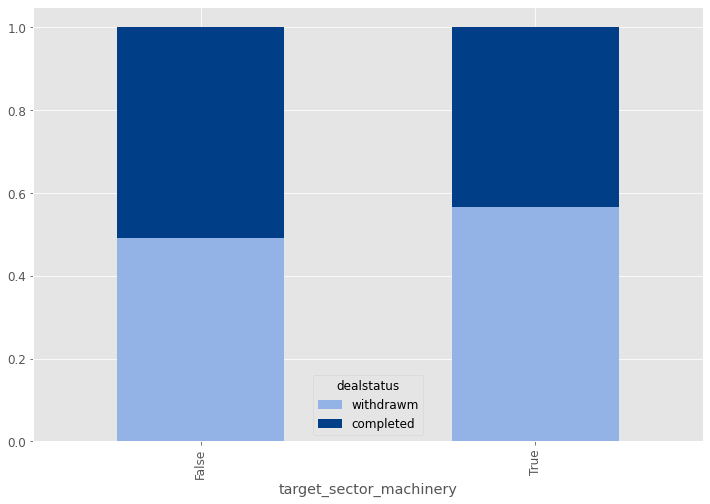

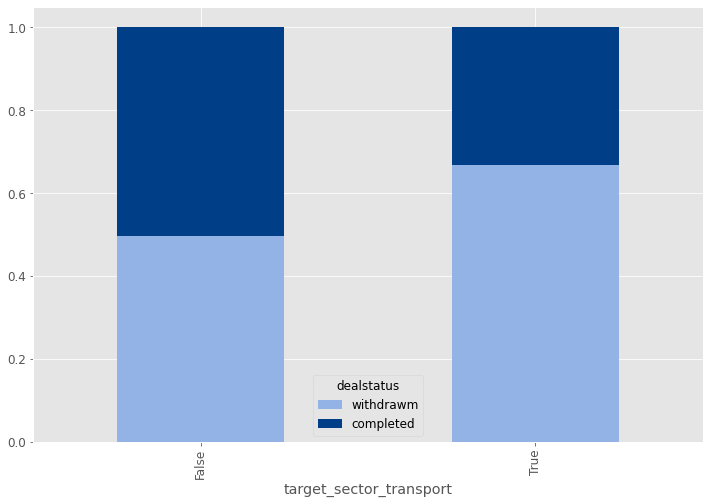

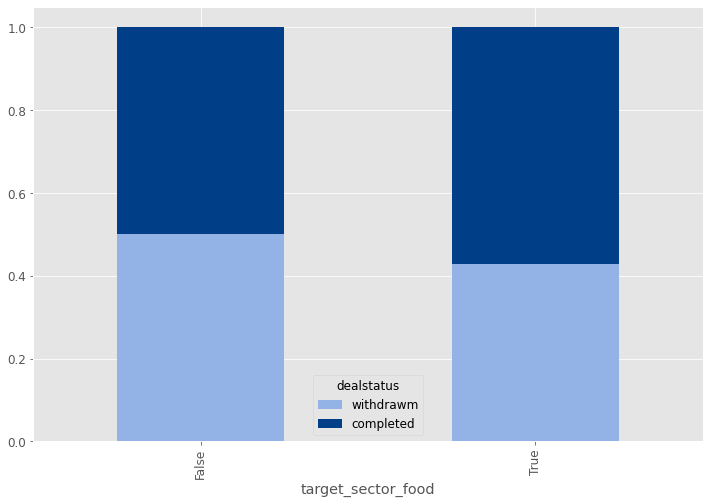

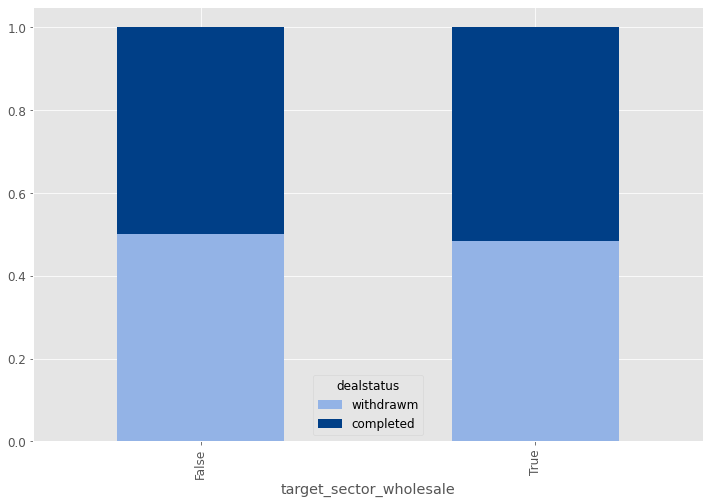

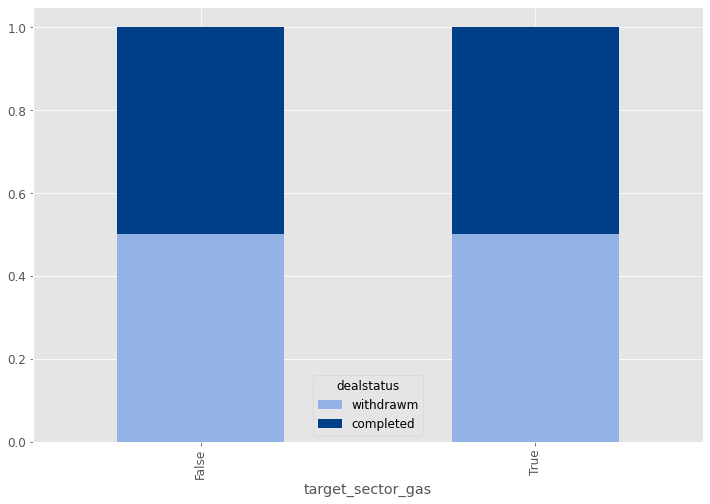

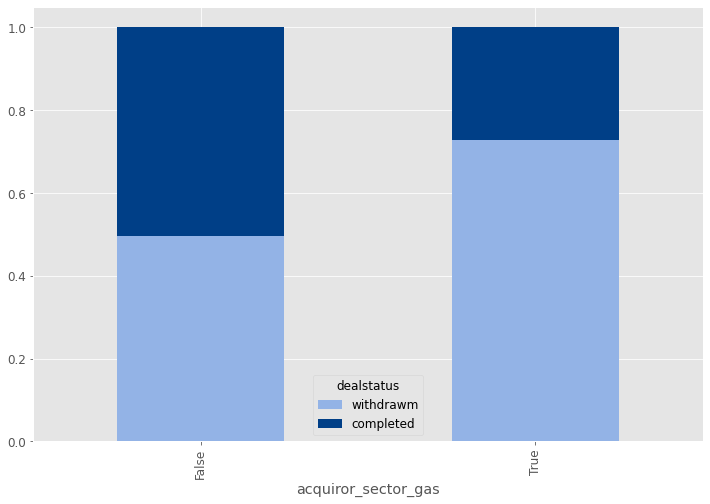

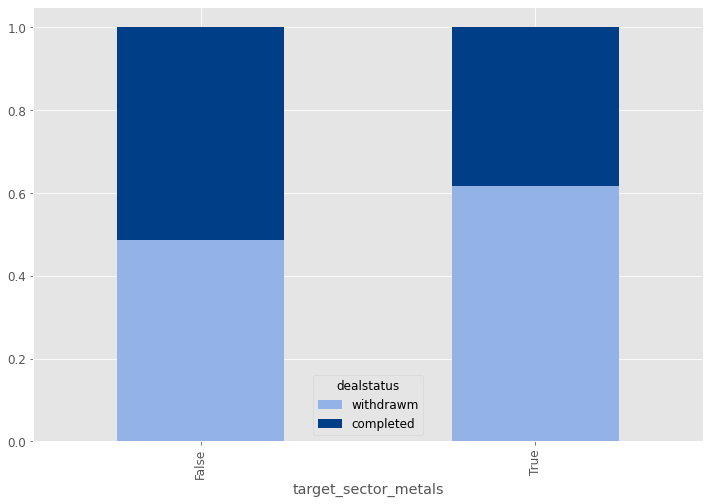

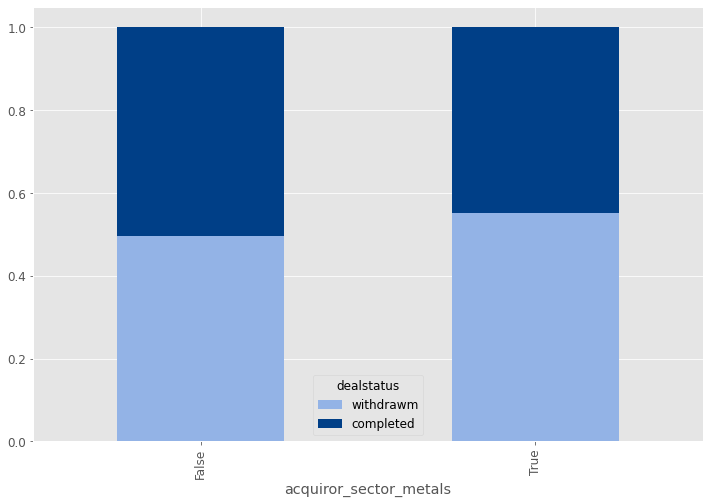

In [10]:
y = 'dealstatus'
for x in model_comparisons['tree']['features']:
    crosstab = pd.crosstab(dffeatured[x], dffeatured[y])
    crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0)
    crosstab_percent = crosstab_percent.rename(columns={0: 'withdrawm',
                                                        1: 'completed'})
    crosstab_percent.plot.bar(stacked=True, color=['#93B3E6', '#003F87'])